based on https://gist.github.com/DerekChia/f12a4d60b7afc9bcb509595d3b727d6f

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(15,10)

In [7]:
def generate_dataset():
    x_batch = np.linspace(0, 2, 100)
    y_batch = 1.5 * x_batch + np.random.randn(*x_batch.shape) * 0.2 + 0.5
    return x_batch, y_batch

In [8]:
def linear_regression():
    x = tf.placeholder(tf.float32, shape=(None, ), name='x')
    y = tf.placeholder(tf.float32, shape=(None, ), name='y')

    with tf.variable_scope('lreg') as scope:
        w = tf.Variable(np.random.normal(), name='W')
        b = tf.Variable(np.random.normal(), name='b')

        y_pred = tf.add(tf.multiply(w, x), b)

        loss = tf.reduce_mean(tf.square(y_pred - y))

    return x, y, y_pred, loss

In [27]:
x_batch, y_batch = generate_dataset()

x, y, y_pred, loss = linear_regression()

optimizer = tf.train.GradientDescentOptimizer(0.1)
train_op = optimizer.minimize(loss)

with tf.Session() as session:
    session.run(tf.global_variables_initializer())

    feed_dict = {x: x_batch, y: y_batch}

    for i in range(1000):
        _ = session.run(train_op, feed_dict)
        #print(i, "loss:", loss.eval(feed_dict))

        #print('Predicting')
    y_pred_batch = session.run(y_pred, {x : x_batch})

(0, 2)

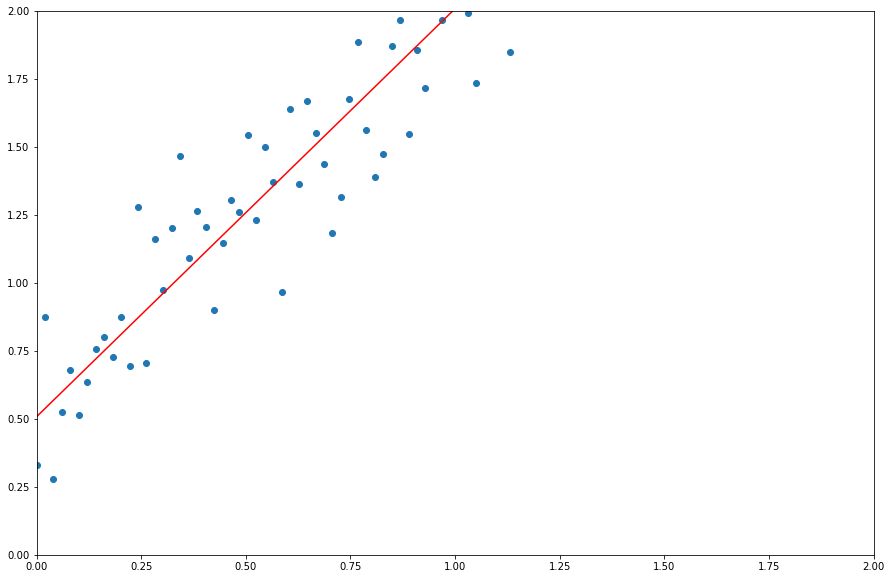

In [28]:
plt.scatter(x_batch, y_batch)
plt.plot(x_batch, y_pred_batch, color='red')
plt.xlim(0, 2)
plt.ylim(0, 2)